In [1]:
url = "https://raw.githubusercontent.com/gaurav9909/Machine_Learning_Projects/refs/heads/main/Restaurant_Customer_Reviews/Restaurant_Reviews.tsv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(url,sep='\t')

In [4]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
df.shape

(1000, 2)

In [6]:
df.size

2000

In [7]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

<Axes: >

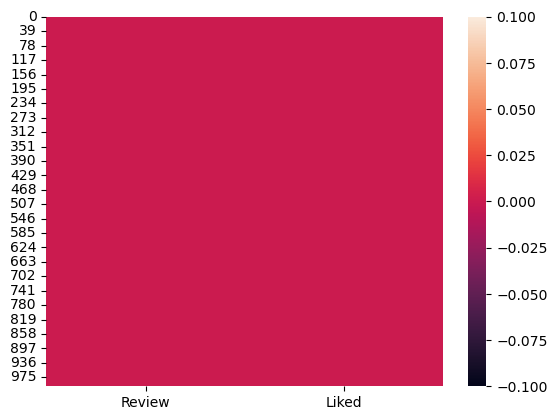

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked'>

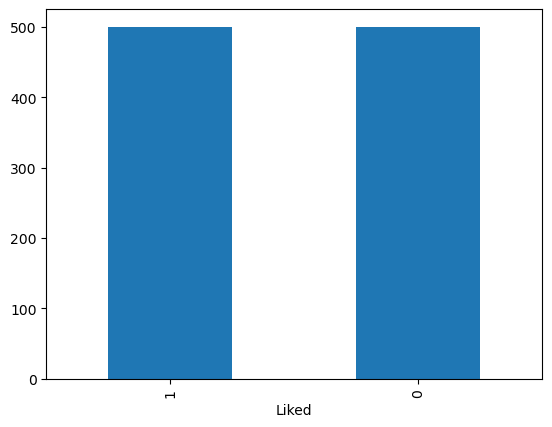

In [12]:
df['Liked'].value_counts().plot(kind='bar')

In [13]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 1000):

    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])

    # convert all cases to lower cases
    review = review.lower()

    # split to array(default delimiter is " ")
    review = review.split()

    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()

    # loop for stemming each word
    # in string array at ith row
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]

    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)

    # append each string to create
    # array of clean text
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = df.iloc[:, 1].values


In [15]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [17]:
maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.83 on Random State = 67


In [18]:

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=142,test_size=.3)

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
ETs_model = ExtraTreesClassifier()
ET_model = ExtraTreeClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model,ETs_model,ET_model ]

In [21]:
accuracy=[]
f1=[]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.66666666666666
F1 SCore                 78.31715210355988
Confusion Matrix of  LogisticRegression()  is 
 [[112  24]
 [ 43 121]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       136
           1       0.83      0.74      0.78       164

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

**************************************************
Accuracy_Score of  RidgeClassifier() is 77.33333333333333
F1 SCore                 78.343949044586
Confusion Matrix of  RidgeClassifier()  is 
 [[109  27]
 [ 41 123]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       136
           1       0.82      0.75      0.78       164

    accuracy                           0.77       300
   macro avg       0.77      0.78      0.77       300
weighted

In [22]:
from sklearn.model_selection import cross_val_score
acc=[]
cross=[]
diff=[]
for i in model:
    acc.append(accuracy_score(y_test,i.predict(X_test))*100)
    cross.append(cross_val_score(i,X,y,cv=5, scoring='accuracy').mean()*100)
    diff.append((accuracy_score(y_test,i.predict(X_test))*100)- (cross_val_score(i,X,y,cv=5, scoring='accuracy').mean()*100))

pd.DataFrame({'Model':model,'Accuracy':acc,'Cross Validation':cross,'Difference':diff})

,Model,Accuracy,Cross Validation,Difference
0,LogisticRegression(),77.666667,76.5,1.166667
1,RidgeClassifier(),77.333333,76.5,0.833333
2,DecisionTreeClassifier(),71.000000,70.5,0.900000
3,SVC(),70.666667,77.3,-6.633333
4,KNeighborsClassifier(),61.000000,66.7,-5.700000
5,"(DecisionTreeClassifier(max_features='sqrt', r...",73.333333,74.2,-0.866667
6,"XGBClassifier(base_score=None, booster=None, c...",71.333333,73.5,-2.166667
7,SGDClassifier(),76.666667,76.3,2.366667
8,(DecisionTreeClassifier(random_state=127261360...,74.000000,73.2,1.600000
9,"(DecisionTreeClassifier(max_depth=1, random_st...",73.000000,73.7,-0.700000


In [23]:
accuracy=[]
f1=[]
cross=[]

for m in model:
    m.fit(X_train,y_train)

    pred= m.predict(X_test)

    f1.append(round(f1_score(y_test,pred) * 100, 2))
    cross.append(cross_val_score(i,X,y,cv=5, scoring='f1').mean()*100)

pd.DataFrame({'Model':model,'F1':f1,'Cross Validation':cross})

,Model,F1,Cross Validation
0,LogisticRegression(),78.32,70.646318
1,RidgeClassifier(),78.34,66.766450
2,DecisionTreeClassifier(),71.92,68.307951
3,SVC(),66.92,69.428303
4,KNeighborsClassifier(),58.06,69.026584
5,"(DecisionTreeClassifier(max_features='sqrt', r...",70.50,70.229021
6,"XGBClassifier(base_score=None, booster=None, c...",70.14,70.423760
7,SGDClassifier(),77.26,68.419938
8,(DecisionTreeClassifier(random_state=140433383...,77.13,69.230358
9,"(DecisionTreeClassifier(max_depth=1, random_st...",70.11,68.336215


In [24]:

from sklearn.model_selection import GridSearchCV

In [25]:
RD_model = RidgeClassifier()

In [26]:
RD_model.get_params()

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [27]:
parameters = {'alpha': [1,2,3],
              'solver': ['auto'],
              'random_state':[0,10,20,30,40,50],
              'fit_intercept':[True,False],
              'max_iter':[10,20,30]
              }

In [28]:
GCV = GridSearchCV(RD_model, parameters,scoring='accuracy' ,cv=5)
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [1, 2, 3], 'fit_intercept': [True, False],
                         'max_iter': [10, 20, 30],
                         'random_state': [0, 10, 20, 30, 40, 50],
                         'solver': ['auto']},
             scoring='accuracy')

In [29]:
GCV.best_params_

{'alpha': 3,
 'fit_intercept': True,
 'max_iter': 10,
 'random_state': 0,
 'solver': 'auto'}

In [30]:
GCV.best_estimator_

RidgeClassifier(alpha=3, max_iter=10, random_state=0)

In [31]:
pred = GCV.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)

0.76

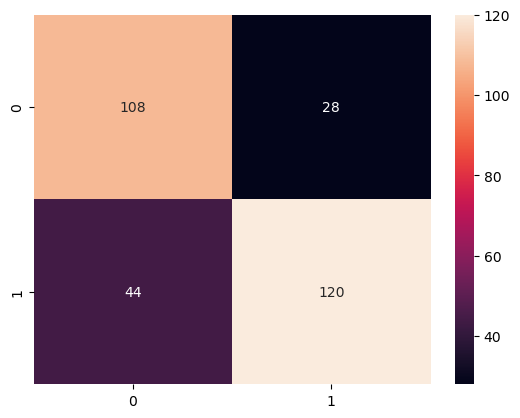

In [32]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')
plt.show()

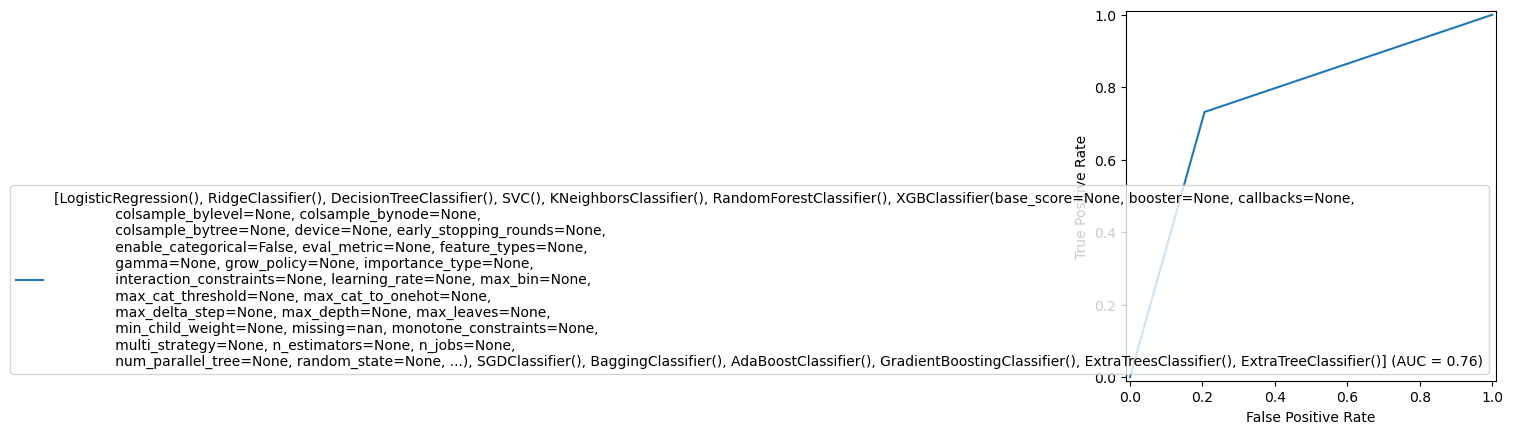

In [33]:

from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

In [34]:
import joblib
joblib.dump(GCV.best_estimator_,'RidgeClassifier.pkl')

['RidgeClassifier.pkl']

In [37]:
# prompt: GUI for above code with help of tkinter

import tkinter as tk
from tkinter import ttk

def predict_sentiment(review):
  # Replace this with your actual prediction code
  return "Positive"

def on_button_clicked():
  review = review_input.get("1.0", tk.END).strip()
  if review:
    sentiment = predict_sentiment(review)
    output_label.config(text=f"Sentiment: {sentiment}")
  else:
    output_label.config(text="Please enter a review.")

# Create main window
window = tk.Tk()
window.title("Restaurant Review Sentiment Analysis")

# Create input text box
review_input = tk.Text(window, height=5, width=40)
review_input.pack(pady=10)

# Create button to trigger prediction
predict_button = ttk.Button(window, text="Predict Sentiment", command=on_button_clicked)
predict_button.pack()

# Create output label to display prediction
output_label = ttk.Label(window, text="")
output_label.pack(pady=10)

window.mainloop()

# Project By :-- Gaurav Birari